In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [55]:
#1. 
#1.1.1
df_og = pd.read_csv("GlobalLandTemperaturesByState.csv", skiprows = [1,379137])
#1.1.2
df = df_og.filter(items = ['dt', 'AverageTemperature', 'State'])
#1.1.3
df["dt"] = pd.to_datetime(df["dt"])
df = df[df["dt"].dt.year > 2000]
df

,dt,AverageTemperature,State
1747,2001-01-01,25.743,Acre
1748,2001-02-01,26.087,Acre
1749,2001-03-01,26.139,Acre
1750,2001-04-01,26.366,Acre
1751,2001-05-01,25.660,Acre
...,...,...,...
645668,2013-05-01,21.634,Zhejiang
645669,2013-06-01,24.679,Zhejiang
645670,2013-07-01,29.272,Zhejiang
645671,2013-08-01,29.202,Zhejiang


In [56]:
#1.1.4
df_filtered = df[df['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]
df_filtered

,dt,AverageTemperature,State
350772,2001-01-01,-2.592,Nebraska
350773,2001-02-01,-5.575,Nebraska
350774,2001-03-01,2.077,Nebraska
350775,2001-04-01,10.431,Nebraska
350776,2001-05-01,15.878,Nebraska
...,...,...,...
626433,2013-05-01,10.607,Wyoming
626434,2013-06-01,16.267,Wyoming
626435,2013-07-01,20.222,Wyoming
626436,2013-08-01,19.621,Wyoming


In [57]:
#1.2
avg_temp_by_date = df.groupby('dt')['AverageTemperature'].mean().reset_index()
avg_temp_by_date.columns = ["Date", "Average Temp"]
avg_temp_by_date

,Date,Average Temp
0,2001-01-01,-0.924046
1,2001-02-01,0.154564
2,2001-03-01,5.088274
3,2001-04-01,11.560249
4,2001-05-01,16.176357
...,...,...
148,2013-05-01,16.636224
149,2013-06-01,20.038432
150,2013-07-01,21.292237
151,2013-08-01,20.504776


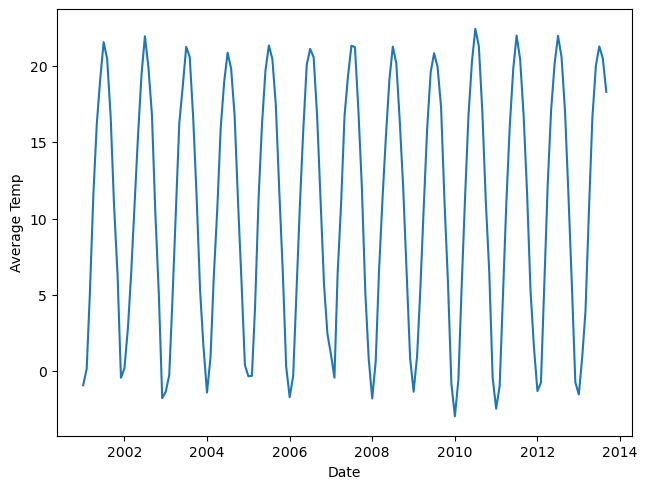

In [58]:
#1.3
plt.figure()
plt.plot(avg_temp_by_date['Date'], avg_temp_by_date['Average Temp'])
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Average Temp")
plt.show()

In [59]:
#1.4
avg_temp_by_date["Date_numeric"] = (avg_temp_by_date["Date"] - pd.Timestamp("1970-01-01")) / pd.Timedelta(days=1)
avg_temp_by_date

,Date,Average Temp,Date_numeric
0,2001-01-01,-0.924046,11323.0
1,2001-02-01,0.154564,11354.0
2,2001-03-01,5.088274,11382.0
3,2001-04-01,11.560249,11413.0
4,2001-05-01,16.176357,11443.0
...,...,...,...
148,2013-05-01,16.636224,15826.0
149,2013-06-01,20.038432,15857.0
150,2013-07-01,21.292237,15887.0
151,2013-08-01,20.504776,15918.0


In [63]:
from scipy.optimize import curve_fit

def f(X,a,b,c,d):
    return a*np.cos(b*X - c) + d
x = avg_temp_by_date["Date_numeric"]
y = avg_temp_by_date["Average Temp"]

#1.6
p0 = [1, 0.0172, 0, 10] 

params, pcov = curve_fit(f, x, y, maxfev = 1500, p0=p0)
params, pcov

(array([-11.33224271,   0.01719758,  -0.05519361,  10.67072012]),
 array([[1.08142119e-02, 7.09259781e-10, 2.41278527e-05, 6.15243163e-05],
        [7.09259781e-10, 4.76869904e-11, 6.50250835e-07, 1.12633182e-08],
        [2.41278527e-05, 6.50250835e-07, 8.95173168e-03, 1.72905555e-04],
        [6.15243163e-05, 1.12633182e-08, 1.72905555e-04, 5.43709189e-03]]))

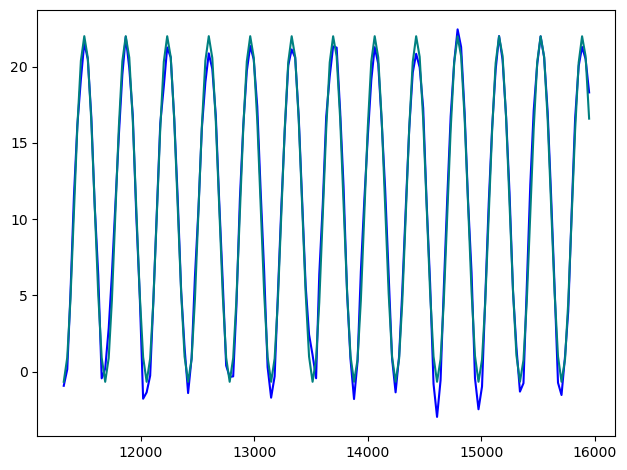

In [66]:
fitted_y_data = f(x, *params)
plt.figure()
plt.plot(x, y, color = "blue")
#plt.plot(x, f(10, 0.0172, 10, 11), color = "teal")
plt.plot(x, fitted_y_data, color = "teal")
plt.tight_layout()
plt.show()

In [68]:
y_expected = f(avg_temp_by_date['Average Temp'], params[0], params[1], params[2], params[3])
y_expected

0     -0.652771
1     -0.642564
2     -0.546338
3     -0.297923
4     -0.037559
         ...   
148   -0.007896
149    0.232178
150    0.329708
151    0.267889
152    0.105813
Name: Average Temp, Length: 153, dtype: float64

In [71]:
errors = np.sqrt(np.diag(pcov))
errors

array([1.03991403e-01, 6.90557676e-06, 9.46135914e-02, 7.37366387e-02])

In [73]:
for param, error in zip(params, errors):
    print(f"Parameter: {param:.4f} ± {error:.4f}")


Parameter: -11.3322 ± 0.1040
Parameter: 0.0172 ± 0.0000
Parameter: -0.0552 ± 0.0946
Parameter: 10.6707 ± 0.0737


In [75]:
final_equation = f"y = {params[0]:.4f} * sin({params[1]:.4f} * x + {params[2]:.4f}) + {params[3]:.4f}"
print("Final Equation:", final_equation)

Final Equation: y = -11.3322 * sin(0.0172 * x + -0.0552) + 10.6707


In [77]:
from astropy.table import QTable, Table, Column
from astropy import units as u
table = Table.read('global_CCl4_MM.dat', format='ascii')
print(table)

CCl4ottoyr CCl4ottomon CCl4ottoNHm ... CCl4ottoSHsd CCl4ottoGLm CCl4ottoGLsd
---------- ----------- ----------- ... ------------ ----------- ------------
      1996           1         nan ...          nan         nan          nan
      1996           2         nan ...          nan         nan          nan
      1996           3         nan ...          nan         nan          nan
      1996           4     105.318 ...        0.238     104.144        0.155
      1996           5     105.032 ...        0.287     103.893        0.174
      1996           6     105.327 ...        0.273     104.207        0.191
      1996           7      105.25 ...        0.233     104.136        0.147
      1996           8     104.855 ...        0.213     103.836        0.161
      1996           9     104.909 ...        0.441     103.861        0.254
      1996          10     104.735 ...        0.435     103.801         0.25
       ...         ...         ... ...          ...         ...          ...

In [79]:
df = table.to_pandas()
df

,CCl4ottoyr,CCl4ottomon,CCl4ottoNHm,CCl4ottoNHsd,CCl4ottoSHm,CCl4ottoSHsd,CCl4ottoGLm,CCl4ottoGLsd
0,1996,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,2,NaN,NaN,NaN,NaN,NaN,NaN
2,1996,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,4,105.318,0.197,102.969,0.238,104.144,0.155
4,1996,5,105.032,0.193,102.754,0.287,103.893,0.174
...,...,...,...,...,...,...,...,...
283,2019,8,NaN,NaN,NaN,NaN,NaN,NaN
284,2019,9,NaN,NaN,NaN,NaN,NaN,NaN
285,2019,10,NaN,NaN,NaN,NaN,NaN,NaN
286,2019,11,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df = df[['CCl4ottoyr', 'CCl4ottoGLm', 'CCl4ottoGLsd']]



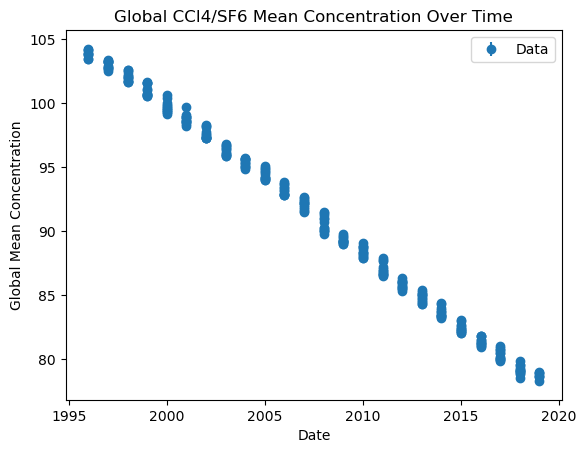

In [83]:
plt.errorbar(df['CCl4ottoyr'], df['CCl4ottoGLm'], yerr=df['CCl4ottoGLsd'], fmt='o', label='Data')
plt.xlabel('Date')
plt.ylabel('Global Mean Concentration')
plt.title('Global CCl4/SF6 Mean Concentration Over Time')
plt.legend()
plt.show()


In [119]:
def f(x, a, b):
   return a*x + b
df = df.dropna()
x = df['CCl4ottoyr']
y = df['CCl4ottoGLm']

#p0 = [-105/25, 105]
p0 = [0,0]
params, pcov = curve_fit(f, x, y, p0 = p0)
params, pcov

(array([-1.14326355e+00,  2.38630051e+03]),
 array([[ 1.41739143e-05, -2.84529685e-02],
        [-2.84529685e-02,  5.71176419e+01]]))

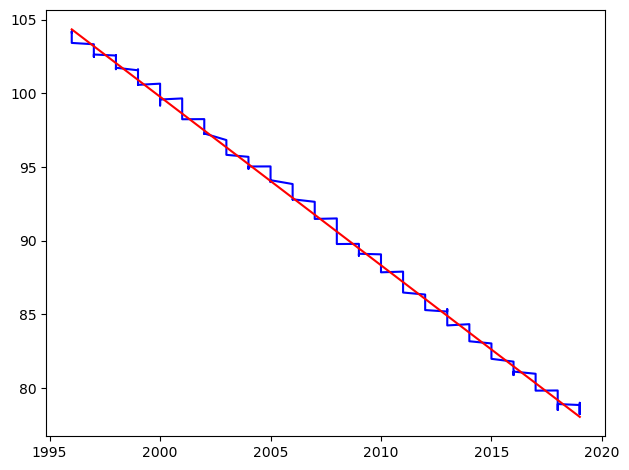

In [125]:
fitted_y_data = f(x, *params)
plt.figure()
plt.plot(x, y, color = "blue")
plt.plot(x, fitted_y_data, color = "red")
plt.tight_layout()
plt.show()

In [141]:
#from scipy.stats import chisquare
observed_values = df['CCl4ottoGLm']

#chi2_statistic, p_value = chisquare(f_obs = observed_values, f_exp= expected_values)
expected_values = -1.14326355*df['CCl4ottoyr'] + 2.38630051*10**3

chi_square = sum(((observed_values - expected_values)**2)/expected_values)
chi_square

0.5544759259713532

In [ ]:
# Linear model seems appropriate